# Install

In [ ]:
!pip install fuzzywuzzy
!pip install faiss-cpu
!pip install umap-learn hdbscan
!pip install arabic-reshaper fuzzywuzzy python-Levenshtein faiss-cpu sentence-transformers
!pip install python-bidi
!pip install langdetect
!pip install umap hdbscan
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.7/162.7 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9

# Import packages

In [ ]:
# Import necessary libraries
import os
import re
import numpy as np
import pandas as pd
import torch
import umap
import hdbscan
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from fuzzywuzzy import fuzz, process
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
import faiss


# Loading Dataset

In [6]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define file path
file_path = "/content/drive/My Drive/activities-hackathon/DATASET SPLIT/proposition_AA.xlsx"

# Load the dataset
df = pd.read_excel(file_path)

# Display basic info to check the structure
print("Dataset Loaded Successfully ")
print("Shape of Dataset:", df.shape)
print("Columns in Dataset:", df.columns)

# Show the first few rows
df.head()


Dataset Loaded Successfully 
Shape of Dataset: (4087, 5)
Columns in Dataset: Index(['code_pro', 'wilaya', 'field', 'activity', 'description'], dtype='object')


,code_pro,wilaya,field,activity,description
0,LPC2SE3W,Algiers,Services à la personne,معالجة ملفات تأشيرة و خدمات الزبائن,معالجة ملفات تأشيرة و حجز مواعيد والتوجبه الزب...
1,DBX8Y5D7,Batna,"Conseil, Expertise et formation",مستشار مختص بتأشيرات السفر و برامج الهجرة,تقديم استشارات في مجال السفر و الهجرة من أجل م...
2,PYC53DLT,Msila,Services à la personne,الرسم بالزيت والرمل,رسم أشخاص و طبيعة و مناظر صحراوية بالزيت والرمل
3,QPLT5VHP,Tipaza,Services à la personne,التركيب الصحي و الغاز و التدفئة المركزية,كلما يخص الترصيص الصحي و الغاز و التدغئة المركزية
4,F4ETDRAH,Tipaza,"Conseil, Expertise et formation",مختص في تربية النحل,تقديم دورات مصورة عن بعد ودورات ميدانية في مجا...


## Checking missing values

In [ ]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display columns with missing values
print("Missing Values per Column:")
print(missing_values)

# Show only the rows with missing values
df_missing = df[df.isnull().any(axis=1)]

print("\nRows with Missing Values:")
df_missing


Missing Values per Column:
code_pro         0
wilaya          40
field          422
activity         0
description      0
dtype: int64

Rows with Missing Values:


,code_pro,wilaya,field,activity,description
11,97T7TLYW,Mila,NaN,بائع مجوهرات,بيع وإصلاح المجوهرات الذهبية
22,LRZMMV3X,Boumerdes,NaN,بسكتة وحلويات ومواد الحم,بسكت وحلويات
44,2F5SENXC,Blida,NaN,مشرف فني,تعريف : هو الشخص الذي يشرف على أعمال فنية مثل ...
57,8AKLM7A6,Blida,NaN,مستشار فني,تعريف : هو الشخص الذي يقدم استشارات في ميدان ا...
63,63MQKRSZ,Tiaret,NaN,صناعة مواد التنظيف,صناعة مواد التنظيف
...,...,...,...,...,...
4003,4EDYUPKD,NaN,Services numériques et activités connexes,استراتيجية التداول,"إذا اخترق السعر مستوى 110,000دولار ، بمكنك محو..."
4018,FYH6G9PA,El Meniaa,NaN,خياطة,خياطة ألبسة عصرية وتقليدية
4025,SU5KWQTW,Skikda,NaN,تجميل بدون جراحة,تنقية البشرة و ازالة الذهون
4060,PX7C4YM3,Oran,NaN,تربية الدواجن,أنا أريد توسيع نطاق العمل بشكل كبير جدا مع مرا...


In [ ]:
# Ensure you have the Arabic NLP model installed
try:
    nlp = spacy.load("xx_ent_wiki_sm")  # Load multilingual model
except:
    !pip install spacy
    !python -m spacy download xx_ent_wiki_sm
    nlp = spacy.load("xx_ent_wiki_sm")

# Download and load Arabic stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

arabic_stopwords = set(stopwords.words('arabic'))


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 66.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('xx_ent_wiki_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Preprocessing

In [ ]:
# Download NLTK Stopwords (If Not Installed)
nltk.download("stopwords")

# Load dataset
file_path = "/content/drive/My Drive/activities-hackathon/DATASET SPLIT/proposition_AA.xlsx"
df = pd.read_excel(file_path)

# **1️⃣ Define Stopwords & Normalization Rules**
arabic_stopwords = set(stopwords.words("arabic"))
extra_stopwords = {"و", "في", "من", "على", "الى", "أن", "عن", "ما", "لا", "لم", "لن", "قد", "هذا", "هذه", "ذلك", "تلك", "كل", "هكذا"}
arabic_stopwords.update(extra_stopwords)

# **2️⃣ Arabic Text Cleaning & Normalization**
def preprocess_arabic_text(text):
    """Remove Arabic stopwords, handle 'و', and apply light stemming."""
    text = re.sub(r'[\u064B-\u0652]', '', text)  # Remove Arabic diacritics (Tashkeel)
    text = re.sub(r'[^\u0600-\u06FF\s]', '', text)  # Keep only Arabic characters
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces

    words = text.split()

    # Remove "و" if it appears at the beginning of a word
    words = [word[1:] if word.startswith("و") and len(word) > 1 else word for word in words]

    # Remove standalone "و" and other stopwords
    words = [word for word in words if word not in arabic_stopwords]

    # Apply light stemming (basic heuristic)
    stemmed_words = []
    for word in words:
        if word.endswith("ون") or word.endswith("ات"):
            word = word[:-2]  # Remove plural suffix
        elif word.endswith("ه") or word.endswith("ى"):
            word = word[:-1]  # Remove final "ه" or "ى"
        stemmed_words.append(word)

    return ' '.join(stemmed_words)

# **3️⃣ Language Detection & Processing**
def is_arabic(text):
    """Check if the text contains Arabic characters."""
    return any("\u0600" <= char <= "\u06FF" for char in str(text))

def detect_and_preprocess(text):
    """Detect language and apply the appropriate preprocessing function."""
    if not text or text.strip() == "":
        return text

    try:
        if is_arabic(text):
            return preprocess_arabic_text(text)  # Arabic detected
        lang = detect(text)
        return preprocess_arabic_text(text) if lang == "ar" else text
    except Exception as e:
        print(f"Language detection error: {e}")
        return text  # Return the original text if detection fails

# **4️⃣ Apply Processing to Dataset**
df['processed_activity'] = df['activity'].astype(str).apply(detect_and_preprocess)
df['processed_description'] = df['description'].astype(str).apply(detect_and_preprocess)

print("✅ Text Preprocessing Completed Successfully!")

# **5️⃣ Handle Missing Values & Save Cleaned Dataset**
df.fillna("", inplace=True)
output_path = "/content/drive/My Drive/activities-hackathon/Data_cleaning_final/processed_proposition_AA.xlsx"
df.to_excel(output_path, index=False)

print("\n✅ Preprocessing Complete! Data Saved to:")
print(output_path)
df[["processed_activity", "processed_description"]].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✅ Text Preprocessing Completed Successfully!

✅ Preprocessing Complete! Data Saved to:
/content/drive/My Drive/activities-hackathon/Data_cleaning_final/processed_proposition_AA.xlsx


,processed_activity,processed_description
0,معالجة ملف تأشيرة خدم الزبائن,معالجة ملف تأشيرة حجز مواعيد التوجب الزبائن تن...
1,مستشار مختص بتأشير السفر برامج الهجرة,تقديم استشار مجال السفر الهجرة مساعدة الناس ال...
2,الرسم بالزيت الرمل,رسم أشخاص طبيعة مناظر صحراوية بالزيت الرمل
3,التركيب الصحي الغاز التدفئة المركزية,يخص الترصيص الصحي الغاز التدغئة المركزية
4,مختص تربية النحل,تقديم دور مصورة دور ميدانية مجال تربية النحل ت...


# Cleaning and Deduplication of Arabic Activity Data Using Multilingual Embeddings



#### **Overview**

This script performs data cleaning and deduplication on Arabic activity data using multilingual text embeddings and cosine similarity. The goal is to identify and remove redundant activities by comparing them to an official reference list.

#### **Steps Overview**

**Load Datasets:** Import the official activity list and the proposed dataset for cleaning.

Load Pretrained Embedding Model: Use Alibaba-NLP/gte-multilingual-base for multilingual text embeddings.

**Generate Text Embeddings:** Compute vector representations for both datasets.

**Similarity Matching:** Compare proposed activities against official ones to detect duplicates.

**Remove Redundant Activities:** Eliminate duplicate activities with high similarity scores.

**Final Filtering:** Remove activities containing official keywords to ensure uniqueness.

**Save Results:** Export the cleaned dataset and the list of removed redundant activities.

**Summary Report:** Display statistics and sample results.

In [ ]:
# ------------------ 1) LOAD DATASETS ------------------
official_file_path = "/content/drive/My Drive/activities-hackathon/activity_list.xlsx"
input_file_path = "/content/drive/My Drive/activities-hackathon/Data_cleaning_final/processed_proposition_AA.xlsx"

df_official = pd.read_excel(official_file_path)
df_proposed = pd.read_excel(input_file_path)

# Ensure columns are treated as strings
df_official["ar_name_activity"] = df_official["ar_name_activity"].astype(str).str.strip()
df_proposed["processed_activity"] = df_proposed["processed_activity"].astype(str).str.strip()
df_proposed["processed_description"] = df_proposed["processed_description"].astype(str).str.strip()

print("Official list size:", len(df_official))
print("Proposed dataset size:", len(df_proposed))

# ------------------ 2) LOAD MODEL ON GPU IF AVAILABLE ------------------
device = "cuda" if torch.cuda.is_available() else "cpu"
model = SentenceTransformer("Alibaba-NLP/gte-multilingual-base", device=device, trust_remote_code=True)
print(f"Using device: {device}")

# ------------------ 3) GENERATE EMBEDDINGS ------------------
# For the official list, use the Arabic activity name
df_official["combined_activity"] = df_official["ar_name_activity"]

# For the proposed list, combine processed activity and description
df_proposed["combined_text"] = df_proposed["processed_activity"] + " " + df_proposed["processed_description"]

# Generate embeddings for the official list
df_official["activity_embeddings"] = list(
    model.encode(df_official["combined_activity"].tolist(), convert_to_numpy=True, batch_size=64)
)

# Generate embeddings for the proposed list
df_proposed["activity_embeddings"] = list(
    model.encode(df_proposed["combined_text"].tolist(), convert_to_numpy=True, batch_size=64)
)

print("Embeddings generated successfully!")

# ------------------ 4) SIMILARITY MATCHING FUNCTION ------------------
def find_best_embedding_match(activity_embedding, official_embeddings, official_names, threshold=0.65):
    """
    Matches an activity embedding with the most similar official activity using cosine similarity.
    Returns (best_match_name, best_score) if above threshold, else (None, None).
    """
    similarities = cosine_similarity([activity_embedding], official_embeddings)[0]
    best_index = np.argmax(similarities)
    best_score = similarities[best_index]

    if best_score >= threshold:
        return official_names[best_index], best_score
    return None, None

# ------------------ 5) FIND REDUNDANT ACTIVITIES BASED ON EMBEDDINGS ------------------
official_embeddings_matrix = np.vstack(df_official["activity_embeddings"].to_numpy())
official_names = df_official["combined_activity"].tolist()

matched_activities = []
duplicate_indices = []
for idx, row in df_proposed.iterrows():
    best_match, best_score = find_best_embedding_match(
        row["activity_embeddings"],
        official_embeddings_matrix,
        official_names,
        threshold=0.70
    )
    if best_match:
        matched_activities.append((row["combined_text"], best_match, best_score * 100))  # Score in %
        duplicate_indices.append(idx)

redundant_activities = pd.DataFrame(
    matched_activities,
    columns=["Proposed Activity", "Best Matched Official Activity", "Best Score (%)"]
)
redundant_activities["Best Score (%)"] = redundant_activities["Best Score (%)"].round(2)

# ------------------ 6) REMOVE REDUNDANT ACTIVITIES (Embedding-Based Removal) ------------------
df_cleaned = df_proposed.drop(index=duplicate_indices).copy()

# ------------------ 7) FINAL FILTERING: REMOVE ANY ACTIVITY CONTAINING AN OFFICIAL WORD ------------------
def remove_official_substrings(df, official_list):
    """
    Remove any row from df if its combined_text contains any substring from the official_list.
    Both strings are lower-cased for matching.
    """
    mask = df["combined_text"].str.lower().apply(
        lambda text: any(off.lower() in text for off in official_list)
    )
    # Return rows that do NOT contain any official activity substring.
    return df[~mask]

df_final = remove_official_substrings(df_cleaned, official_names)

# ------------------ 8) SAVE RESULTS ------------------
output_folder = "/content/drive/My Drive/activities-hackathon/Data_cleaning_final/Data_cleaning_final_gpu"
os.makedirs(output_folder, exist_ok=True)

output_redundant = os.path.join(output_folder, "redundant_activities.xlsx")
output_cleaned = os.path.join(output_folder, "final_cleaned_proposed.xlsx")


df_final.drop(columns=["activity_embeddings"], inplace=True)

redundant_activities.to_excel(output_redundant, index=False, sheet_name="Redundant Activities")
df_final.to_excel(output_cleaned, index=False, sheet_name="Cleaned Activities")

# ------------------ 9) DISPLAY SUMMARY ------------------
print(f"\nTotal Redundant Activities Removed (Embedding-based): {len(redundant_activities)}")
print(f"Final Unique Activities Retained (after final filtering): {len(df_final)}")

print("\nSample of Matched Activities (Top 5):")
print(redundant_activities.head(5).to_string(index=False))

print("\nSample of Final Cleaned Activities (Top 5):")
print(df_final[["combined_text"]].head(5).to_string(index=False))


Official list size: 1464
Proposed dataset size: 4087


Some weights of the model checkpoint at Alibaba-NLP/gte-multilingual-base were not used when initializing NewModel: {'classifier.weight', 'classifier.bias'}
- This IS expected if you are initializing NewModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing NewModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Using device: cuda
Embeddings generated successfully!


<ipython-input-6-099ec2c1ef56>:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.drop(columns=["activity_embeddings"], inplace=True)



Total Redundant Activities Removed (Embedding-based): 1490
Final Unique Activities Retained (after final filtering): 2542

Sample of Matched Activities (Top 5):
                                                                                                                                                                                     Proposed Activity Best Matched Official Activity  Best Score (%)
مستشار مختص بتأشير السفر برامج الهجرة تقديم استشار مجال السفر الهجرة مساعدة الناس الحصول المعلوم الصحيحة المصادر الرسمية توضيح الحقوق الواجب تقديم النصائح تمكنهم ضمان حقوقهم تجنب الاحتيال خلال سفرهم         مستشار الهجرة السحابية           74.38
                                                                                  مختص تربية النحل تقديم دور مصورة دور ميدانية مجال تربية النحل تقني تربية الملك انتاج الغذاء الملكي مختلف منتج الخلية             أخصائي تربية النحل           79.43
                                                                                                    

In [ ]:
# Set device and load model
device = "cuda" if torch.cuda.is_available() else "cpu"
model = SentenceTransformer("Alibaba-NLP/gte-multilingual-base", device=device, trust_remote_code=True)
print(f"Using device: {device}")

# Save the model locally
local_model_path = "/content/local_gte_multilingual_base"
os.makedirs(local_model_path, exist_ok=True)
model.save(local_model_path)
print(f"Model saved to {local_model_path}")

Some weights of the model checkpoint at Alibaba-NLP/gte-multilingual-base were not used when initializing NewModel: {'classifier.weight', 'classifier.bias'}
- This IS expected if you are initializing NewModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing NewModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Using device: cuda
Model saved to /content/local_gte_multilingual_base


# Validation of Cleaned Activity Data Against the Official List


#### **Overview**
This script performs **final validation** to ensure that no activities from the **official list** are mistakenly included in the **cleaned dataset**. The validation process involves checking whether any **official activity name** appears as a **substring** in the cleaned activities.

#### **Steps Overview**
1. **Load Datasets**: Import the **official list** and the **final cleaned dataset**.
2. **Preprocess Official Activities**: Convert names to **lowercase** for accurate substring matching.
3. **Validate Cleaned Data**: Check if any **official activity appears in the cleaned dataset**.
4. **Display Results**: Report any **detected overlaps** for review.

In [ ]:
# ------------------ 1) LOAD OFFICIAL LIST & FINAL CLEANED DATA ------------------
official_file_path = "/content/drive/My Drive/activities-hackathon/activity_list.xlsx"
cleaned_file_path = "/content/drive/My Drive/activities-hackathon/Data_cleaning_final/Data_cleaning_final_gpu/final_cleaned_proposed.xlsx"

df_official = pd.read_excel(official_file_path)
df_cleaned = pd.read_excel(cleaned_file_path)

# Ensure official activities are lower-case and stripped
df_official["ar_name_activity"] = df_official["ar_name_activity"].astype(str).str.lower().str.strip()
official_activities = df_official["ar_name_activity"].tolist()

# Combine the cleaned processed activity and description if not already present
if "combined_text" not in df_cleaned.columns:
    df_cleaned["combined_text"] = df_cleaned["processed_activity"].astype(str) + " " + df_cleaned["processed_description"].astype(str)
else:
    df_cleaned["combined_text"] = df_cleaned["combined_text"].astype(str)

# ------------------ 2) VALIDATION: SEARCH FOR OFFICIAL SUBSTRINGS ------------------
def contains_official_substring(text, official_list):
    text_lower = text.lower()
    for official in official_list:
        # Check if the official activity appears as a substring in the cleaned text
        if official in text_lower:
            return True, official
    return False, None

found_matches = []
for idx, row in df_cleaned.iterrows():
    found, matched_official = contains_official_substring(row["combined_text"], official_activities)
    if found:
        found_matches.append((row["combined_text"], matched_official))

# ------------------ 3) DISPLAY VALIDATION RESULTS ------------------
if found_matches:
    print(f"Warning: Found {len(found_matches)} instances where an official activity appears in the cleaned dataset.")
    print("Here are up to 5 examples:")
    for i, (cleaned_text, official_match) in enumerate(found_matches[:5], 1):
        print(f"{i}. Official activity found: '{official_match}'")
        print(f"   In cleaned text: {cleaned_text[:150]}...")  # Show first 150 characters
        print("-" * 50)
else:
    print("Validation Passed: No official activities found in the final cleaned dataset.")


Validation Passed: No official activities found in the final cleaned dataset.


## Check for New Activity in the Official List Using Embeddings

#### **Overview**
This script checks if a newly entered activity already exists in the **official list** by using **multilingual text embeddings** and **cosine similarity**.

#### **Steps Overview**
1. **Load Official Activity List**: Import the official dataset and preprocess activity names.
2. **Load Pretrained Model**: Use **`Alibaba-NLP/gte-multilingual-base`** for multilingual text embeddings.
3. **Generate Embeddings**:
   - Compute **embeddings for official activities**.
   - Compute **embedding for the new activity** entered by the user.
4. **Calculate Similarity**:
   - Use **cosine similarity** to compare the new activity against the official list.
   - Identify the **best match** if the similarity score exceeds **0.65**.
5. **Display Results**:
   - If a similar activity exists, show the **best match and similarity score**.
   - Otherwise, confirm that it's **a new activity**.

In [ ]:
# Load official activity list
official_file_path = "/content/drive/My Drive/activities-hackathon/activity_list.xlsx"
df_official = pd.read_excel(official_file_path)
df_official["ar_name_activity"] = df_official["ar_name_activity"].astype(str).str.strip()
official_activities = df_official["ar_name_activity"].tolist()

# Load model on GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
model = SentenceTransformer("Alibaba-NLP/gte-multilingual-base", device=device, trust_remote_code=True)
print(f"Using device: {device}")

# Generate embeddings for official activities
official_embeddings = model.encode(official_activities, convert_to_numpy=True, batch_size=64)
official_embeddings = normalize(official_embeddings)

# Set similarity threshold
threshold = 0.65

# Interactive prompt for new activity
new_activity = input("Enter a new activity: ").strip()

# Generate embedding for the new activity
new_embedding = model.encode([new_activity], convert_to_numpy=True, batch_size=1)
new_embedding = normalize(new_embedding)

# Compute cosine similarity
similarities = cosine_similarity(new_embedding, official_embeddings)[0]
best_index = np.argmax(similarities)
best_score = similarities[best_index]

# Display result
if best_score >= threshold:
    print(f"Activity already exists! Best match: '{official_activities[best_index]}' with similarity score: {best_score:.2f}")
else:
    print("This is a new activity!")


Some weights of the model checkpoint at Alibaba-NLP/gte-multilingual-base were not used when initializing NewModel: {'classifier.weight', 'classifier.bias'}
- This IS expected if you are initializing NewModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing NewModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Using device: cuda
Enter a new activity: مهندس تقني في الصيانة
Activity already exists! Best match: 'مهندس تقني في الصيانة' with similarity score: 1.00


# Cleaning and Filtering Arabic Activity Data: Removing Commercial Activities

#### **Overview**
This script processes an **Arabic activity dataset** to **remove commercial activities** and **filter out generic trader-related words**. The goal is to retain **only non-commercial, relevant activities** while preserving essential intermediary and digital commerce activities.

#### **Steps Overview**
1. **Load Datasets**: Import the **official activity list** and the **proposed dataset**.
2. **Load Embedding Model**: Use **`Alibaba-NLP/gte-multilingual-base`** for multilingual embeddings.
3. **Generate Embeddings**: Compute text embeddings for **activities, commercial, and allowed intermediary activities**.
4. **Remove Commercial Activities**:
   - Compare **proposed activities** with **commercial keywords**.
   - Retain **intermediary e-commerce activities**.
5. **Remove Unwanted Substrings**: Eliminate activities containing **generic trader-related words**.
6. **Save Results**: Export **cleaned non-commercial** and **final filtered datasets**.
7. **Generate Summary Report**: Display **key statistics** and **sample cleaned activities**.

---




In [ ]:
# ------------------ 1 LOAD DATASETS ------------------
official_file_path = "/content/drive/My Drive/activities-hackathon/activity_list.xlsx"
input_file_path = "/content/drive/My Drive/activities-hackathon/Data_cleaning_final/Data_cleaning_final_gpu/final_cleaned_proposed.xlsx"

df_official = pd.read_excel(official_file_path)
df_proposed = pd.read_excel(input_file_path)

# Ensure text columns are strings and stripped of extra spaces
df_official["ar_name_activity"] = df_official["ar_name_activity"].astype(str).str.strip()
df_proposed["processed_activity"] = df_proposed["processed_activity"].astype(str).str.strip()
df_proposed["processed_description"] = df_proposed["processed_description"].astype(str).str.strip()

print("Official list size:", len(df_official))
print("Proposed dataset size:", len(df_proposed))

# ------------------ 2 LOAD EMBEDDING MODEL ------------------
device = "cuda" if torch.cuda.is_available() else "cpu"
model = SentenceTransformer("Alibaba-NLP/gte-multilingual-base", device=device, trust_remote_code=True)
print(f"Using device: {device}")

# Helper function to generate embeddings
def get_embeddings(text):
    return model.encode([text], convert_to_numpy=True, batch_size=1)[0]

# ------------------ 3 GENERATE EMBEDDINGS ------------------
df_proposed["combined_text"] = df_proposed["processed_activity"] + " " + df_proposed["processed_description"]
df_proposed["activity_embeddings"] = list(model.encode(df_proposed["combined_text"].tolist(), convert_to_numpy=True, batch_size=64))

print(" Embeddings generated successfully!")

# ------------------ 4 REMOVE COMMERCIAL ACTIVITIES ------------------

#  **Commercial keywords (activities to remove)**
commercial_keywords_ar = [
    "مطعم", "بيع", "شراء", "مقهى", "وجبات سريعة", "جزارة", "سمك", "هاتف", "مجوهرات", "متجر", "دكان",
    "مورد", "تاجر تجزئة", "تاجر جملة", "بائع", "مستورد", "مُصدر", "امتياز", "تجارة",
    "بيع بالتجزئة", "منتجات غذائية", "منتجات استهلاكية", "تصفية", "بازار", "سوق", "بيع السيارات",
    "وكلاء تجاريين", "خدمات التوصيل", "إنشاء", "معدات البناء", "تجهيزات صناعية", "هواتف محمولة",
    "صيانة", "إيجار", "توزيع", "استيراد", "تجارة التجزئة", "موزع", "تاجر محلي", "زراعي", "منتجات زراعية",
    "تجارة عامة", "تاجر متجول", "نقل"
]

#  **Allowed intermediary & e-commerce activities (to keep)**
intermediary_keywords_ar = [
    "تجارة إلكترونية", "منصة بيع", "متجر إلكتروني", "موقع تجاري", "سوق إلكتروني", "دروبشيبينغ",
    "تسويق بالعمولة", "متجر على الإنترنت", "تجارة افتراضية", "تجارة رقمية", "مورد تجارة إلكترونية",
    "شركة ناشئة", "ريادي رقمي", "خدمات الدفع", "وكيل تجاري", "سمسار", "إعلانات عبر الإنترنت",
    "مستشار", "خدمات عبر الإنترنت", "مستقل", "منصة عمل مستقل", "تسويق", "تسويق رقمي", "إدارة الحملات",
    "منصة إعلانات", "تسويق بالعمولة", "وسيط", "وكيل مبيعات", "حلول رقمية", "تخزين سحابي", "دعم العملاء",
    "إعلانات رقمية", "وسائل التواصل الاجتماعي", "منصة بي تو بي", "شبكة توزيع"
]

# Compute embeddings for commercial and allowed keywords
df_commercial_keywords = pd.DataFrame({"keyword": commercial_keywords_ar})
df_commercial_keywords["embedding"] = df_commercial_keywords["keyword"].apply(get_embeddings)
commercial_embeddings_all = np.vstack(df_commercial_keywords["embedding"].to_numpy())

df_allowed_keywords = pd.DataFrame({"keyword": intermediary_keywords_ar})
df_allowed_keywords["embedding"] = df_allowed_keywords["keyword"].apply(get_embeddings)
allowed_embeddings_all = np.vstack(df_allowed_keywords["embedding"].to_numpy())

# Function to classify activities as commercial or allowed
def classify_activity(activity_embedding, threshold=0.6):
    comm_sim = cosine_similarity([activity_embedding], commercial_embeddings_all)[0]
    allowed_sim = cosine_similarity([activity_embedding], allowed_embeddings_all)[0]
    max_comm_sim = np.max(comm_sim)
    max_allowed_sim = np.max(allowed_sim)
    return max_comm_sim >= threshold and max_comm_sim > max_allowed_sim  # Keep only allowed intermediary activities

df_proposed["is_commercial"] = df_proposed["activity_embeddings"].apply(lambda emb: classify_activity(emb, threshold=0.6))

# Keep only **non-commercial** activities
df_non_commercial = df_proposed[df_proposed["is_commercial"] == False].copy()

print(f" Commercial activities removed. Remaining non-commercial activities: {len(df_non_commercial)}")

# ------------------ 5 REMOVE UNWANTED SUBSTRINGS ------------------
#  **Remove activities containing generic trader-related words (e.g., بائع, تداول, بيع)**
blacklist_words = ["تداول", "بائع", "بيع"]

def remove_blacklisted_substrings(df, blacklist):
    mask = df["combined_text"].str.lower().apply(lambda text: any(blk in text for blk in blacklist))
    return df[~mask]

df_final = remove_blacklisted_substrings(df_non_commercial, blacklist_words)

print(f" Final filtering done. Cleaned dataset size: {len(df_final)}")

# ------------------ 6 SAVE RESULTS ------------------
output_folder = "/content/drive/My Drive/activities-hackathon/Data_cleaning_final/Data_cleaning_final_gpu"
os.makedirs(output_folder, exist_ok=True)

output_non_commercial = os.path.join(output_folder, "non_commercial_activities.csv")
output_final = os.path.join(output_folder, "final_cleaned_proposed.csv")

df_non_commercial.to_csv(output_non_commercial, index=False, encoding="utf-8")
df_final.to_csv(output_final, index=False, encoding="utf-8")

print(f" Non-commercial activities saved to: {output_non_commercial}")
print(f" Final cleaned activities saved to: {output_final}")

# ------------------ 7 DISPLAY SUMMARY ------------------
total_activities = df_proposed.shape[0]
commercial_count = df_proposed[df_proposed["is_commercial"] == True].shape[0]
non_commercial_count = df_proposed[df_proposed["is_commercial"] == False].shape[0]
final_count = df_final.shape[0]

print(f"\n **Final Report**")
print(f" Total activities (proposed): {total_activities}")
print(f" Commercial activities removed: {commercial_count}")
print(f" Non-commercial activities retained: {non_commercial_count}")
print(f" Final cleaned activities (after removing unwanted substrings): {final_count}")

print("\n🔍 **Sample of Final Cleaned Activities (Top 5):**")
print(df_final[["processed_activity", "processed_description"]].head().to_string(index=False))


Official list size: 1464
Proposed dataset size: 2542


Some weights of the model checkpoint at Alibaba-NLP/gte-multilingual-base were not used when initializing NewModel: {'classifier.weight', 'classifier.bias'}
- This IS expected if you are initializing NewModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing NewModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Using device: cuda
✅ Embeddings generated successfully!
 Commercial activities removed. Remaining non-commercial activities: 1660
 Final filtering done. Cleaned dataset size: 1507
 Non-commercial activities saved to: /content/drive/My Drive/activities-hackathon/Data_cleaning_final/Data_cleaning_final_gpu/non_commercial_activities.csv
 Final cleaned activities saved to: /content/drive/My Drive/activities-hackathon/Data_cleaning_final/Data_cleaning_final_gpu/final_cleaned_proposed.csv

 **Final Report**
 Total activities (proposed): 2542
 Commercial activities removed: 882
 Non-commercial activities retained: 1660
 Final cleaned activities (after removing unwanted substrings): 1507

🔍 **Sample of Final Cleaned Activities (Top 5):**
                  processed_activity                                             processed_description
       معالجة ملف تأشيرة خدم الزبائن معالجة ملف تأشيرة حجز مواعيد التوجب الزبائن تنظيم ملف إعطاء نصائح
التركيب الصحي الغاز التدفئة المركزية                  

In [ ]:
df_final

,code_pro,wilaya,field,activity,description,processed_activity,processed_description,combined_text,activity_embeddings,is_commercial
0,LPC2SE3W,Algiers,Services à la personne,معالجة ملفات تأشيرة و خدمات الزبائن,معالجة ملفات تأشيرة و حجز مواعيد والتوجبه الزب...,معالجة ملف تأشيرة خدم الزبائن,معالجة ملف تأشيرة حجز مواعيد التوجب الزبائن تن...,معالجة ملف تأشيرة خدم الزبائن معالجة ملف تأشير...,"[-0.08039315, 0.002366376, -0.02281516, -0.029...",False
2,QPLT5VHP,Tipaza,Services à la personne,التركيب الصحي و الغاز و التدفئة المركزية,كلما يخص الترصيص الصحي و الغاز و التدغئة المركزية,التركيب الصحي الغاز التدفئة المركزية,يخص الترصيص الصحي الغاز التدغئة المركزية,التركيب الصحي الغاز التدفئة المركزية يخص الترص...,"[-0.106120355, 0.00483411, -0.0018761602, 0.01...",False
3,US1NFGK8,Tiaret,Services aux entreprises,إستخراج الزيوت النباتات العطرية و الطبية,تثمين النباتات العطرية و الطبية خاصة منها الغابية,إستخراج الزيوت النبات العطرية الطبية,تثمين النبات العطرية الطبية الغابية,إستخراج الزيوت النبات العطرية الطبية تثمين الن...,"[0.0012033554, -0.007364388, 0.020365665, 0.02...",False
4,5TGGQBUP,Aïn Defla,Services à la personne,الخياطة و تغليف مقاعد السيارات,الخياطة والتفصيل,الخياطة تغليف مقاعد السيار,الخياطة التفصيل,الخياطة تغليف مقاعد السيار الخياطة التفصيل,"[-0.07495946, -0.0036183356, -0.044251207, 0.0...",False
7,D95WLEN3,Batna,Services aux entreprises,رسكلة البلاستيك,جمع البلاستيك واخذه إلى المصنع لاعادة تحويله,رسكلة البلاستيك,جمع البلاستيك اخذ المصنع لاعادة تحويل,رسكلة البلاستيك جمع البلاستيك اخذ المصنع لاعاد...,"[0.0070776683, -0.0050042113, -0.0030925074, 0...",False
...,...,...,...,...,...,...,...,...,...,...
2531,SU3MVZRR,Algiers,Services de loisirs et de récréation,ورشات فنون,يتضمن في هذه الورشات الفنية قيام بمختلف الانشط...,رش فن,يتضمن الورش الفنية قيام بمختلف الانشطة الفنية ...,رش فن يتضمن الورش الفنية قيام بمختلف الانشطة ا...,"[-0.08866526, -0.021442926, -0.039301135, -0.0...",False
2533,6CE19QVY,El Meniaa,Services à la personne,طبخ بجميع انواعها,جميع أنواع الطبخ المنزلي تقليدي وعصري (مملحات)...,طبخ بجميع انواعها,أنواع الطبخ المنزلي تقليدي عصري مملح كذالك طبخ...,طبخ بجميع انواعها أنواع الطبخ المنزلي تقليدي ع...,"[-0.108603336, 0.03286228, -0.04315339, -0.059...",False
2536,3754EQK2,Souk Ahras,Prestations à domicile,صناعة الحلويات التقليدية,صناعة الحلويات والكسرة والمحاشب والبغرير بصفة ...,صناعة الحلوي التقليدية,صناعة الحلوي الكسرة المحاشب البغرير بصفة أنواع...,صناعة الحلوي التقليدية صناعة الحلوي الكسرة الم...,"[-0.07161496, 0.03811824, -0.041370086, 0.0428...",False
2537,F24LD2SG,Ouled Djellal,Services aux entreprises,خدمات مكتبية,توفير ادوات مكتبيةومطبوعات وخدمات واستشارات,خدم مكتبية,توفير ادو مكتبيةومطبوع خدم استشار,خدم مكتبية توفير ادو مكتبيةومطبوع خدم استشار,"[-0.039165784, 0.025380824, -0.008471635, 0.02...",False


# Clustering Arabic Activities Using UMAP and HDBSCAN

#### **Overview**
This script clusters **Arabic activity data** using **multilingual text embeddings, UMAP dimensionality reduction, and HDBSCAN clustering**. The goal is to **group similar activities** based on their embeddings for further analysis.

#### **Steps Overview**
1. **Load Dataset**: Import the cleaned activity dataset.
2. **Load Multilingual Embedding Model**: Use **`Alibaba-NLP/gte-multilingual-base`** for text embeddings.
3. **Generate Embeddings**: Compute vector representations for activities.
4. **Normalize Embeddings**: Convert embeddings to a **matrix** and normalize values.
5. **Apply UMAP Dimensionality Reduction**:
   - Reduce to **5 dimensions** for clustering.
   - Reduce further to **2D for visualization**.
6. **Apply HDBSCAN Clustering**:
   - Identify activity clusters.
   - Detect **noise points (outliers)**.
7. **Visualize Clusters**: Generate a **UMAP 2D scatter plot**.
8. **Display Clustered Activities**: Show **sample activities per cluster**.

---


Some weights of the model checkpoint at Alibaba-NLP/gte-multilingual-base were not used when initializing NewModel: {'classifier.bias', 'classifier.weight'}
- This IS expected if you are initializing NewModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing NewModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


 Computed embeddings for 1507 activities.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


 UMAP dimensionality reduction completed.
 Clusters found: 44
 Noise Points: 209


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


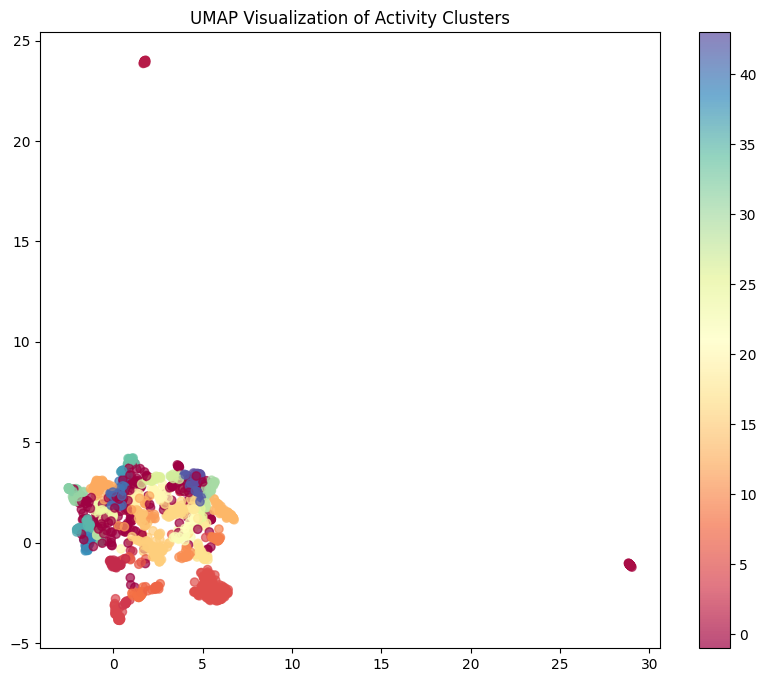


 **Cluster 0** (Size: 31)
        processed_activity                                                                 processed_description
توزيع تركيب الاجهزة الطبية يقوم المقاول الذاتي بتوزيع تركيب العتاد الاجهزة الطبية العياد المستشفي المخابر الطبية
توزيع تركيب الاجهزة الطبية يقوم المقاول الذاتي بتوزيع تركيب العتاد الاجهزة الطبية العياد المستشفي المخابر الطبية
توزيع تركيب الاجهزة الطبية يقوم المقاول الذاتي بتوزيع تركيب العتاد الاجهزة الطبية العياد المستشفي المخابر الطبية
توزيع تركيب الاجهزة الطبية يقوم المقاول الذاتي بتوزيع تركيب العتاد الاجهزة الطبية العياد المستشفي المخابر الطبية
توزيع تركيب الاجهزة الطبية يقوم المقاول الذاتي بتوزيع تركيب العتاد الاجهزة الطبية العياد المستشفي المخابر الطبية

 **Cluster 1** (Size: 30)
        processed_activity                                                                 processed_description
توزيع تركيب الاجهزة الطبية يقوم المقاول الذاتي بتوزيع تركيب العتاد الاجهزة الطبية العياد المستشفي المخابر الطبية
توزيع تركيب الاجهزة الطبية يقوم المقاول ال

In [16]:
#  Load dataset
df = pd.read_csv("/content/drive/My Drive/hackathon1/activities-hackathon/ARABIC_DATASET/Data_cleaning_final/final_cleaned_proposed.csv")

#  Load multilingual embedding model
device = "cuda" if torch.cuda.is_available() else "cpu"
model = SentenceTransformer("Alibaba-NLP/gte-multilingual-base", device=device, trust_remote_code=True)

#  Generate text embeddings
df["combined_text"] = df["processed_activity"] + " " + df["processed_description"]
df["embeddings"] = list(model.encode(df["combined_text"].tolist(), convert_to_numpy=True))

#  Convert to matrix & normalize
embedding_matrix = np.vstack(df["embeddings"].values)
embedding_matrix = normalize(embedding_matrix)

print(f" Computed embeddings for {df.shape[0]} activities.")

#  Apply UMAP dimensionality reduction
umap_reducer = umap.UMAP(n_neighbors=20, n_components=5, metric="cosine", random_state=42)
umap_embeddings = umap_reducer.fit_transform(embedding_matrix)

#  Reduce further to 2D for visualization
umap_2d = umap.UMAP(n_neighbors=20, n_components=2, metric="cosine", random_state=42)
umap_2d_embeddings = umap_2d.fit_transform(embedding_matrix)

print(" UMAP dimensionality reduction completed.")

#  Apply HDBSCAN clustering
clusterer = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=2, metric="euclidean", prediction_data=True)
df["cluster"] = clusterer.fit_predict(umap_embeddings)

#  Check cluster distribution
num_clusters = df["cluster"].nunique() - (1 if -1 in df["cluster"].unique() else 0)
num_noise = list(df["cluster"]).count(-1)

print(f" Clusters found: {num_clusters}")
print(f" Noise Points: {num_noise}")

#  Plot UMAP visualization of clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(umap_2d_embeddings[:, 0], umap_2d_embeddings[:, 1], c=df["cluster"], cmap="Spectral", alpha=0.7)
plt.colorbar(scatter)
plt.title("UMAP Visualization of Activity Clusters")
plt.show()

#  Display top samples per cluster
for cluster_id in sorted(df["cluster"].unique()):
    if cluster_id == -1:  # Ignore noise
        continue
    cluster_df = df[df["cluster"] == cluster_id]
    print(f"\n **Cluster {cluster_id}** (Size: {len(cluster_df)})")
    print(cluster_df[["processed_activity", "processed_description"]].head(5).to_string(index=False))

In [10]:
#  Save the clustered dataset
output_file_path = "/content/drive/My Drive/hackathon1/activities-hackathon/clustered_activities.csv"
df.to_csv(output_file_path, index=False)
print(f" Clustered dataset saved: {output_file_path}")

 Clustered dataset saved: /content/drive/My Drive/hackathon1/activities-hackathon/clustered_activities.csv


### Assigning Labels to Clusters and Saving the Labeled Dataset


In [14]:
cluster_labels = {
    0: "توزيع وتركيب المعدات الطبية",
    1: "توزيع وتركيب المعدات الطبية",
    2: "الفلاحة وتربية المواشي",
    3: "الأطراف الاصطناعية والتمديدات الصحية",
    4: "التمديدات الصحية، الغاز، والتدفئة",
    5: "صناعة وتوصيل المواد الغذائية",
    6: "البناء والحرف اليدوية",
    7: "الحلاقة والعناية بالجسم",
    8: "الطب البديل والعلاج الطبيعي",
    9: "إعادة التدوير وإدارة النفايات",
    10: "استخلاص الزيوت والنباتات العطرية",
    11: "تأجير العقارات والخدمات المنزلية",
    12: "السياحة، السفر، وخدمات التأشيرة",
    13: "النجارة والألمنيوم",
    14: "التسويق والإعلانات عبر الإنترنت",
    15: "الخياطة وتصميم الأزياء",
    16: "التنظيف وخدمات الأمن",
    17: "التعبئة والتغليف والتوزيع",
    18: "الأعمال الفنية والإنشائية المتخصصة",
    19: "الاستشارات التجارية والوساطة",
    20: "خدمات السيارات والأنظمة الذكية",
    21: "صناعة الأثاث والتنجيد",
    22: "الطباعة والإعلانات",
    23: "الترجمة والخدمات اللغوية",
    24: "الإنتاج الإعلامي والخدمات الإبداعية",
    25: "معالجة الرخام والجرانيت",
    26: "الهندسة المدنية والتخطيط العمراني",
    27: "البناء والترميم",
    28: "تركيب البلاط والأرضيات",
    29: "التدريب المهني والتكوين",
    30: "التصميم الداخلي والديكور",
    31: "الترفيه والألعاب",
    32: "ألعاب الفيديو والرياضات الإلكترونية",
    33: "مدارس تعليم السياقة",
    34: "الاستشارات القانونية",
    35: "التعليم والدراسات الدينية",
    36: "الدروس الخصوصية والدعم المدرسي",
    37: "المحاسبة والاستشارات المالية",
    38: "الخدمات النفسية والصحة العقلية",
    39: "التنمية الذاتية والتدريب الشخصي",
    40: "المساعدة الإدارية واستخراج الوثائق",
    41: "الخدمات الرقمية والتجارة الإلكترونية",
    42: "الطلاء ومعالجة الأسطح",
    43: "الزخرفة الخارجية والأعمال الحجرية",
}
# Map cluster labels to dataset
df["Cluster_Label"] = df["cluster"].map(cluster_labels)

# Save the dataset with labeled clusters
output_file = "/content/drive/My Drive/hackathon1/activities-hackathon/clustered_activities_labeled_.csv"
df.to_csv(output_file, index=False, encoding="utf-8-sig")

print(f"📂 Updated dataset saved: {output_file}")


📂 Updated dataset saved: /content/drive/My Drive/hackathon1/activities-hackathon/clustered_activities_labeled_.csv


### Cluster Distribution Analysis and Visualization


 Labeled dataset saved successfully: /content/drive/My Drive/hackathon1/activities-hackathon/clustered_activities_labeled.csv

Cluster Distribution:

Cluster_Label
صناعة وتوصيل المواد الغذائية            159
الخياطة وتصميم الأزياء                   89
السياحة، السفر، وخدمات التأشيرة          61
توزيع وتركيب المعدات الطبية              61
النجارة والألمنيوم                       52
الطلاء ومعالجة الأسطح                    52
التنظيف وخدمات الأمن                     52
الفلاحة وتربية المواشي                   47
الخدمات الرقمية والتجارة الإلكترونية     43
التمديدات الصحية، الغاز، والتدفئة        43
خدمات السيارات والأنظمة الذكية           40
التسويق والإعلانات عبر الإنترنت          31
التصميم الداخلي والديكور                 29
الطب البديل والعلاج الطبيعي              29
الطباعة والإعلانات                       27
الاستشارات القانونية                     27
الترفيه والألعاب                         26
التعبئة والتغليف والتوزيع                25
الزخرفة الخارجية والأعمال الحجرية        24


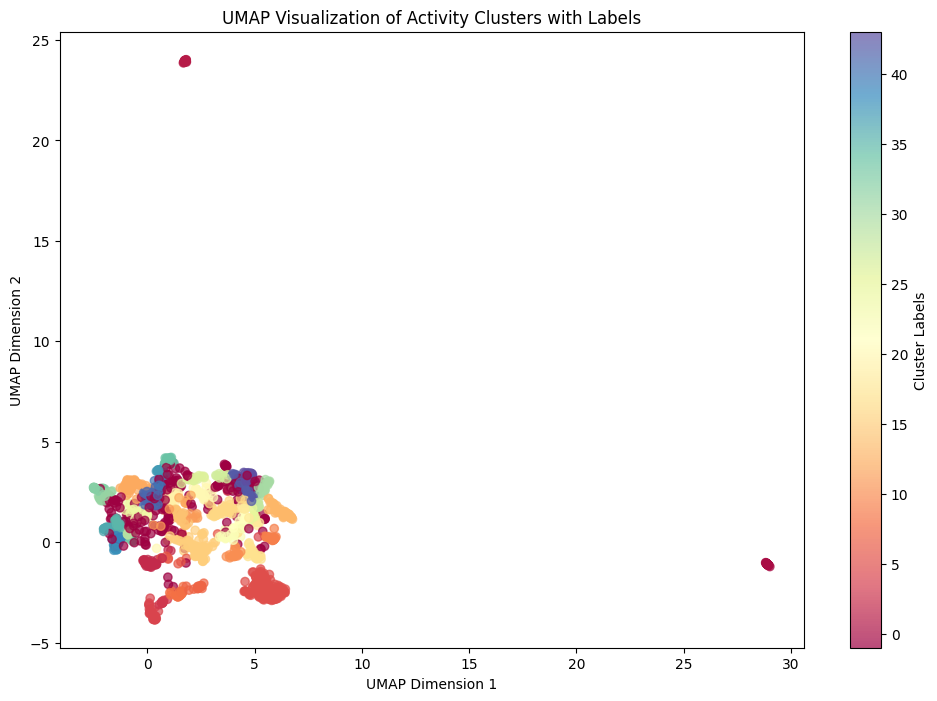

📂 Sample activities per cluster saved: /content/drive/My Drive/hackathon1/activities-hackathon/clustered_activities_samples.csv


In [15]:
print(f" Labeled dataset saved successfully: {output_labeled_file_path}")
# Count number of occurrences per cluster label
cluster_counts = df["Cluster_Label"].value_counts()

# Display distribution
print("\nCluster Distribution:\n")
print(cluster_counts)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(umap_2d_embeddings[:, 0], umap_2d_embeddings[:, 1], c=df["cluster"], cmap="Spectral", alpha=0.7)
plt.colorbar(scatter, label="Cluster Labels")
plt.title("UMAP Visualization of Activity Clusters with Labels")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()

# Extract top 5 samples per cluster and save
samples_per_cluster = df.groupby("Cluster_Label").head(5)
output_samples_path = "/content/drive/My Drive/hackathon1/activities-hackathon/clustered_activities_samples.csv"
samples_per_cluster.to_csv(output_samples_path, index=False, encoding="utf-8-sig")

print(f"📂 Sample activities per cluster saved: {output_samples_path}")
